DATE                             object
PPI                             float64
Export_PI                       float64
Import_PI                       float64
Employees                       float64
Export_PI_Nosemi                float64
Weights                         float64
Import_PI_Cap                   float64
Export_PI_Cap                   float64
Industrial_Production           float64
DateTime                 datetime64[ns]
Season                            int64
dtype: object
           DATE   PPI  Export_PI  Import_PI  Employees  Export_PI_Nosemi  \
180  01-01-2000  88.8      102.0      101.0      641.0             102.7   
181  01-02-2000  88.6      101.9      100.7      646.0             100.5   
182  01-03-2000  88.6      101.3      100.3      649.0             100.5   
183  01-04-2000  88.9      101.4      101.2      654.3             100.1   
184  01-05-2000  88.5      101.0      100.6      659.1             100.2   
..          ...   ...        ...        ...       

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_6244/2463328524.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['DateTime'] = pd.to_datetime(semi['DATE'])
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_6244/2463328524.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['Season'] = (semi['DateTime'].dt.month%12 + 3)//3


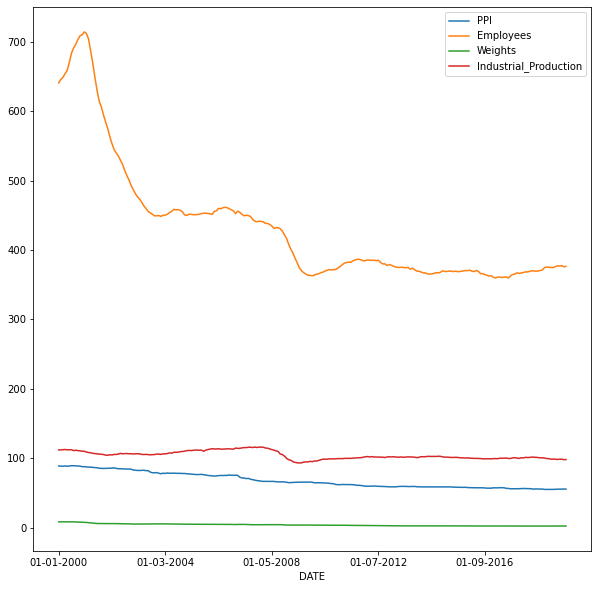

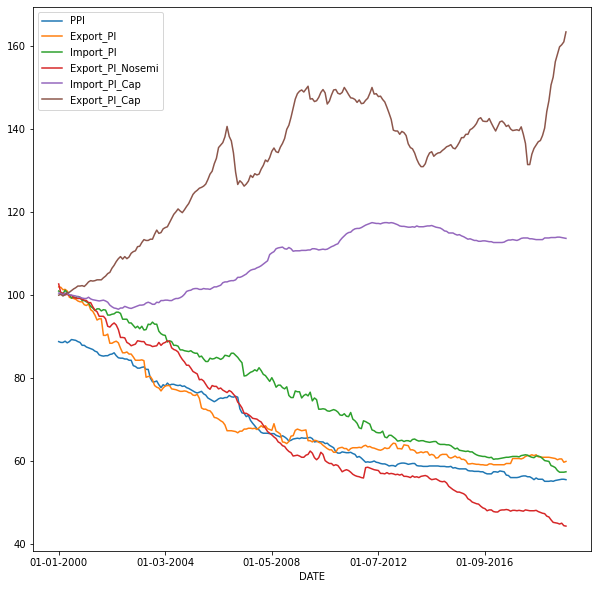

           DATE   PPI  Export_PI  Import_PI  Export_PI_Nosemi  Import_PI_Cap  \
180  01-01-2000  88.8      102.0      101.0             102.7          100.5   
181  01-02-2000  88.6      101.9      100.7             100.5          100.4   
182  01-03-2000  88.6      101.3      100.3             100.5          100.1   
183  01-04-2000  88.9      101.4      101.2             100.1          100.5   
184  01-05-2000  88.5      101.0      100.6             100.2          100.4   
..          ...   ...        ...        ...               ...            ...   
414  01-07-2019  55.4       60.3       57.7              45.0          114.0   
415  01-08-2019  55.5       60.5       57.3              44.8          114.0   
416  01-09-2019  55.6       60.5       57.3              45.0          113.9   
417  01-10-2019  55.6       59.7       57.3              44.4          113.8   
418  01-11-2019  55.5       59.9       57.4              44.3          113.7   

     Export_PI_Cap  
180          100.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


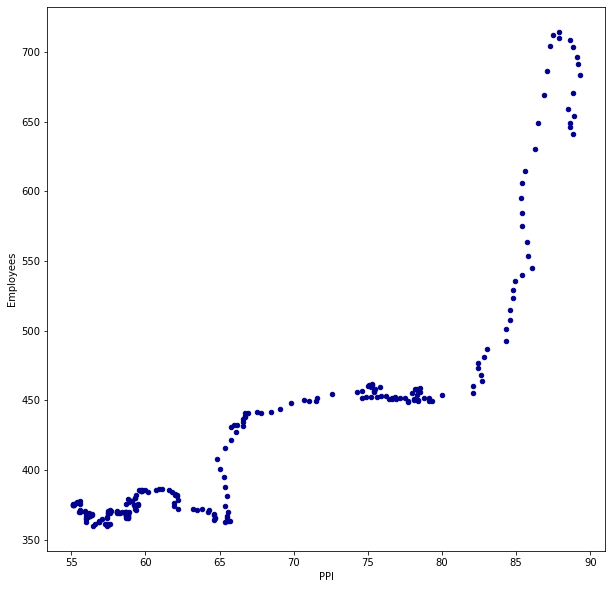

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime

# Read raw data file
# I first tried using the default, long variable (column) names from original data file
# Then tried to "rename" the columns in Python - couldn't get it to work (will need more time)
# So I found it easier to rename the columns in the original *.csv file (new file named "Semi.csv")
semi_raw = pd.read_csv (r'C:\Users\Christian and Gemma\OneDrive\Graduate School\ANA500\Semi.csv')

# Noticed several missing values; limiting variable (with most missing values) was Export_PI_Cap
# So filtered by recasting table using notnull() Boolean subtable:
semi = semi_raw[semi_raw.Export_PI_Cap.notnull()]

# For seasonality, convert DATE object to DateTime and extract Season as new variable:
semi['DateTime'] = pd.to_datetime(semi['DATE'])
semi['Season'] = (semi['DateTime'].dt.month%12 + 3)//3

# Figured out why I had problems in subsequent code; mixture of data types in the dataframe!
convert_dict = {'Export_PI': float,
                'Import_PI': float,
                'Export_PI_Nosemi': float,
                'Import_PI_Cap': float
                }
semi = semi.astype(convert_dict)
print(semi.dtypes)

# Print the filtered (cleaned) dataframe
print (semi)

# Plot the generalized variables by DATE:
df_gen = pd.DataFrame(semi, columns=["DATE", "PPI", "Employees", "Weights", "Industrial_Production"])
df_gen.plot(x="DATE", y=["PPI", "Employees", "Weights", "Industrial_Production"], kind="line", figsize=(10,10))
plt.show()

# Plot the pricing variables by DATE:
# Note: could not figure out why some of the price index variables were not plotting
#       ^^^ This was because I had a mixture of data types in the dataframe; now all plotting after adding astype conversion
df_ppi = pd.DataFrame(semi, columns=["DATE", "PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"])
df_ppi.plot(x="DATE", y=["PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"], kind="line", figsize=(10,10))
plt.show()

# Check to see that extracted data frame has all requested columns; still not sure why not plotting
print(df_ppi)

# Scatter plot - hints at the correlation between my two variables in the null hypothesis
df_scatter = pd.DataFrame(semi, columns=["PPI", "Employees"])
ax1 = df_scatter.plot.scatter(x="PPI", y="Employees", c="DarkBlue", figsize=(10,10))

# Start of the linear regression models - first is PPI as a function of Employee [base]
Y = semi['PPI']
X = semi['Employees']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

print('PPI vs Employees Parameters')
print(results.params)
print()
print('PPI vs Employees')
print(results.summary())

Y = semi['PPI']
X = semi[['Export_PI', 'Import_PI', 'Export_PI_Nosemi', 'Export_PI_Cap', 'Import_PI_Cap']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

# Second linear regression model is PPI as a function of price indices
print('PPI vs Price Index Parameters')
print(results.params)
print()
print('PPI vs Price')
print(results.summary())

<AxesSubplot:xlabel='Season', ylabel='PPI'>

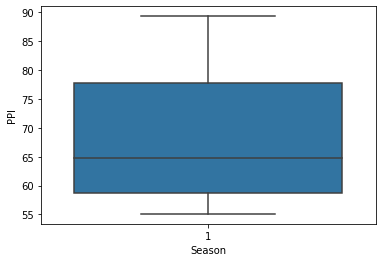

In [26]:
# This cell and the following cells is trying to figure out how to convert the DATE object variable
# in the original data set from DD-MM-YYYY to seasons (either 1,2,3,4 or 1st QTR, 2nd QTR, 3rd, & 4th,
# or Winter, Spring, Summer, Fall)

sns.boxplot(x = semi['Season'],
            y = semi['PPI'])

In [20]:
print(semi)

           DATE   PPI  Export_PI  Import_PI  Employees  Export_PI_Nosemi  \
180  01-01-2000  88.8      102.0      101.0      641.0             102.7   
181  01-02-2000  88.6      101.9      100.7      646.0             100.5   
182  01-03-2000  88.6      101.3      100.3      649.0             100.5   
183  01-04-2000  88.9      101.4      101.2      654.3             100.1   
184  01-05-2000  88.5      101.0      100.6      659.1             100.2   
..          ...   ...        ...        ...        ...               ...   
414  01-07-2019  55.4       60.3       57.7      377.3              45.0   
415  01-08-2019  55.5       60.5       57.3      377.1              44.8   
416  01-09-2019  55.6       60.5       57.3      377.7              45.0   
417  01-10-2019  55.6       59.7       57.3      376.0              44.4   
418  01-11-2019  55.5       59.9       57.4      376.5              44.3   

     Weights  Import_PI_Cap  Export_PI_Cap  Industrial_Production   DateTime  \
180   8

In [31]:
semi['DateTime'] = pd.to_datetime(semi['DATE'])
semi['Season'] = (semi['DateTime'].dt.month%12 + 3)//3

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_12576/259241047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['DateTime'] = pd.to_datetime(semi['DATE'])
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_12576/259241047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['Season'] = (semi['DateTime'].dt.month%12 + 3)//3


In [10]:
print(semi.dtypes)

DATE                             object
PPI                             float64
Export_PI                       float64
Import_PI                       float64
Employees                       float64
Export_PI_Nosemi                float64
Weights                         float64
Import_PI_Cap                   float64
Export_PI_Cap                   float64
Industrial_Production           float64
DateTime                 datetime64[ns]
dtype: object
